## **Exportando arquivo para CSV**

In [ ]:
#Passo 1: importando a biblioteca requests, pandas e json
import requests as r
import pandas as pd
import json

#Passo 2: Montando as variáveis para a URL completa
base_url = 'https://restcountries.com/v3.1' #endereço raíz da api
endpoint = '/region/' #rota específica da API (endpoint)
region = 'europe'

#Passo 3: construindo a URL completa da requisição
url = base_url + endpoint + region
print("URL Final:",url) #verificando qual foi a url final

#Passo 4: Criando requisição e adicionando a uma variável
resposta = r.get(url) #criando requisição
print('Status code:', resposta.status_code) #verificando status code

#Passo 5: verificando e conhecendo o output
data = resposta.json() #salvando o output da requisição em uma variável
print("Verificando header", resposta.headers, '\n') # metadados da requisição, pode conter informações relevantes como o tipo de arquivo que recebemos
print(resposta.text, '\n') #Exibe a resposta bruta da API como string (texto puro)
print('chaves do arquivo', data[0].keys(), '\n') #Visualiza as chaves (campos) do primeiro registro do JSON
print(data[0], '\n') #Mostra o conteúdo completo do primeiro item da resposta
print(json.dumps(resposta.json(), indent=2, ensure_ascii=False)) #ver o conteúdo formatado da resposta
for chave, valor in data[0].items(): #Percorre todas as chaves e valores do primeiro país retornado
    print(chave, "--", valor)

#Passo 6: trazer as informações que queremos para formato de tabela/data frame
#Passo 6.1: Fazer uma lista para armazenar os dados tratados
paises = []
#Passo 6.2: iterar sobre todos os países retornados
for pais in data:
  nome_comum = pais.get('name', {}).get('common', 'n/a'),#pega o nome comum em inglês
  nome_local = pais.get('name', {}).get('official', 'n/a')#pega nome oficial em inglês
  nome_nativo_dict = pais.get('name', {}).get('nativeName', 'n/a')#tenta pegar nome oficial na língua local
  if nome_nativo_dict:
    first_lang = list(nome_nativo_dict.values())[0]
    nome_ntv = first_lang.get('official', 'n/a')
  else:
    nome_ntv = 'n/a'
  capital = pais.get('capital', ['n/a'])[0]
  subregiao = pais.get('subregion', 'n/a')
  moeda = pais.get('currencies', {})
  linguas = pais.get('languages', {})
  paises.append({
      'Nome Comum (Inglês)': nome_comum,
      'Nome Oficial (Inglês)': nome_local,
      'Nome Oficial (Língua Local)': nome_ntv,
      'Capital': capital,
      'Subregião': subregiao,
      'Moeda': moeda,
      'Linguas': linguas
  })

df = pd.DataFrame(paises)
print(df)

#Exportando para CSV
df.to_csv('arquivo_paises.csv', index = False, sep = ';')

A saída de streaming foi truncada nas últimas 5000 linhas.
        "official": "Konfederasi Swiss",
        "common": "Swiss"
      },
      "ita": {
        "official": "Confederazione svizzera",
        "common": "Svizzera"
      },
      "jpn": {
        "official": "スイス連邦",
        "common": "スイス"
      },
      "kor": {
        "official": "스위스 연방",
        "common": "스위스"
      },
      "nld": {
        "official": "Zwitserse Confederatie",
        "common": "Zwitserland"
      },
      "per": {
        "official": "کنفدراسیون سوئیس",
        "common": "سوئیس"
      },
      "pol": {
        "official": "Konfederacja Szwajcarska",
        "common": "Szwajcaria"
      },
      "por": {
        "official": "Confederação Suíça",
        "common": "Suíça"
      },
      "rus": {
        "official": "Швейцарская Конфедерация",
        "common": "Швейцария"
      },
      "slk": {
        "official": "Švajčiarska konfederácia",
        "common": "Švajčiarsko"
      },
      "spa": {
  

# **Lendo Dados em um Banco de Dados**

In [ ]:
from sqlalchemy import create_engine  # Ferramenta para criar a engine de conexão
import pandas as pd  # Biblioteca para análise e manipulação de dados

# Instalação do driver de conexão com MySQL
!pip install pymysql

# Dicionário com as credenciais de acesso ao banco de dados
credenciais = {
    "username": "alunoharve",
    "password": "wj7Hs2itAhv$",
    "hostname": "ip-45-79-142-173.cloudezapp.io",
    "port": 3306,
    "database": "harve_alunos_sql"
}

# Cria a engine de conexão com o banco de dados
engine = create_engine(
    f"mysql+pymysql://{credenciais['username']}:{credenciais['password']}@{credenciais['hostname']}:{credenciais['port']}/{credenciais['database']}"
)

# Escreve a consulta SQL
consulta = "SELECT * FROM fifanova WHERE forca > 80"

# Executa a consulta e armazena o resultado em um DataFrame
dfFifa = pd.read_sql(consulta, engine)

# Exibe o DataFrame com os resultados
print(dfFifa)


# **Escrevendo Dados em um Banco de Dados**

In [ ]:
#Passo 1: importando a biblioteca
import pandas as pd

arquivo = 'https://drive.google.com/uc?id=1Ooex2Jei9sEcuuzhwlpJUKLKX4zQD-Kr'#carregando dataset de pagamentos
df_pgtos = pd.read_csv(arquivo) #criando dataframe com dados carregados
df_pgtos

In [ ]:
from sqlalchemy import create_engine, text

!pip install pymysql

# Credenciais do banco de dados
credenciais = {
    "username": "alunoharve",
    "password": "wj7Hs2itAhv$",
    "hostname": "ip-45-79-142-173.cloudezapp.io",
    "port": 3306,
    "database": "harve_alunos_sql"
}

# Criando a string de conexão
STRING_DE_CONEXAO = f"mysql+pymysql://{credenciais['username']}:{credenciais['password']}@{credenciais['hostname']}:{credenciais['port']}/{credenciais['database']}"

# Criando a conexão
engine = create_engine(STRING_DE_CONEXAO)

# Inserindo dados no banco
print("Inserindo dados no banco... \n")
df_pgtos.to_sql('df_pgtos', engine, if_exists='replace', index=False)

# Verificando se os dados foram salvos
print("\nVerificando dados salvos:")
query = text("SELECT * FROM df_pgtos")
df_verificacao = pd.read_sql(query, engine)
print(df_verificacao)

# Fechando a conexão
print("\nProcesso concluído!")



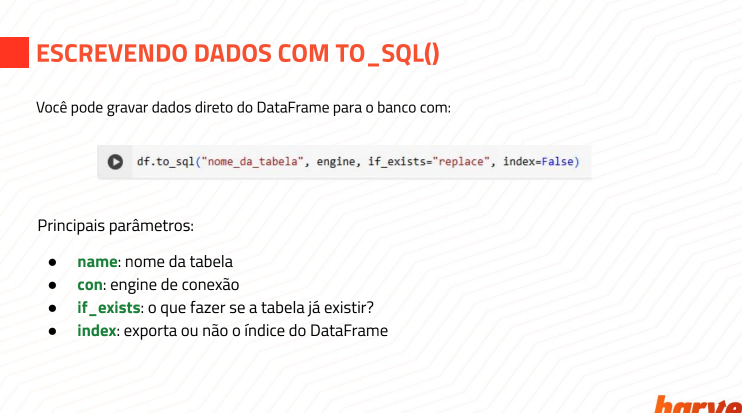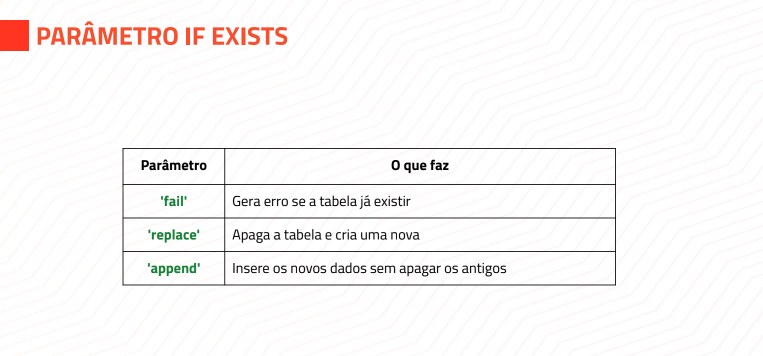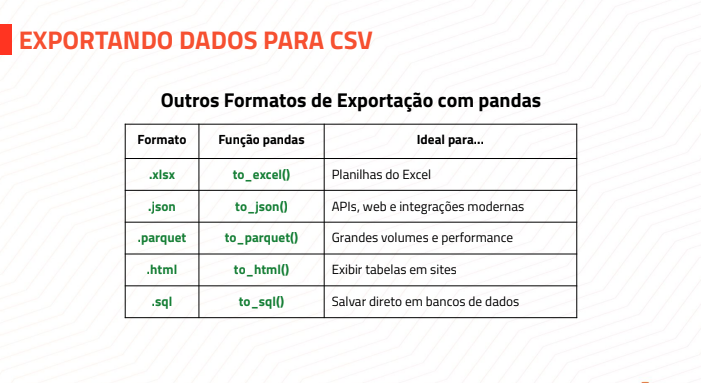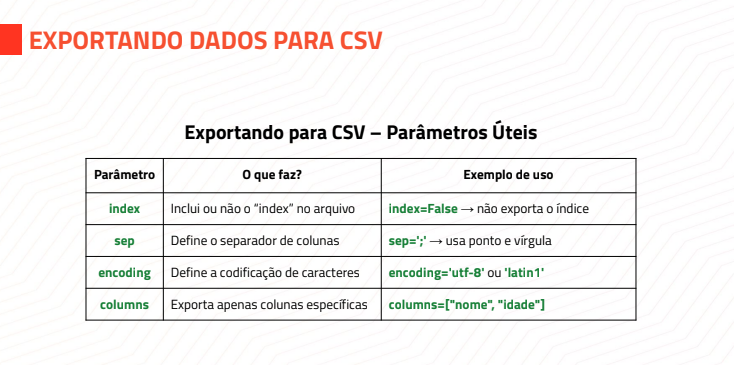